In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
from  IPython.display import display, HTML, display_html
import os


In [2]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'rds_cred_walmart.json',
 'reviews.csv',
 'Time Series Walmart.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'walmart',
 'walmart.csv']

In [3]:
#Read Data
data = pd.read_csv('walmart.csv')
data['sales'] = data.Weekly_Sales
data['date'] = data.Date

data.head(5)

,Unnamed: 0,Date,Weekly_Sales,sales,date
0,1,2010-02-05,24924.50,24924.50,2010-02-05
1,2,2010-02-12,46039.49,46039.49,2010-02-12
2,3,2010-02-19,41595.55,41595.55,2010-02-19
3,4,2010-02-26,19403.54,19403.54,2010-02-26
4,5,2010-03-05,21827.90,21827.90,2010-03-05


In [4]:
data = data.drop('Unnamed: 0', axis = 1)
data = data.drop('Date', axis = 1)
data = data.drop('Weekly_Sales', axis = 1)


In [5]:
data.head()

,sales,date
0,24924.50,2010-02-05
1,46039.49,2010-02-12
2,41595.55,2010-02-19
3,19403.54,2010-02-26
4,21827.90,2010-03-05


In [6]:
data.describe

<bound method NDFrame.describe of            sales        date
0       24924.50  2010-02-05
1       46039.49  2010-02-12
2       41595.55  2010-02-19
3       19403.54  2010-02-26
4       21827.90  2010-03-05
...          ...         ...
421565    508.37  2012-09-28
421566    628.10  2012-10-05
421567   1061.02  2012-10-12
421568    760.01  2012-10-19
421569   1076.80  2012-10-26

[421570 rows x 2 columns]>

In [7]:
data.shape

(421570, 2)

In [8]:
data.describe()

,sales
count,421570.000000
mean,15981.258124
std,22711.183523
min,-4988.940000
25%,2079.650000
50%,7612.030000
75%,20205.852500
max,693099.360000


In [9]:
#group data 
data = data.groupby(by = 'date').agg({'sales': 'sum'}) #alternate with 'counts'
data.index = pd.to_datetime(data.index) # dates to date time format
#data = data.asfreq(freq = '1D')

In [10]:
data = data.sort_index(ascending = True)
data = data.fillna(value = 0)

In [11]:
data

,sales
date,
2010-02-05,49750740.56
2010-02-12,48336677.65
2010-02-19,48276993.74
2010-02-26,43968571.02
2010-03-05,46871470.36
...,...
2012-09-28,43734899.44
2012-10-05,47566639.48
2012-10-12,46128514.37


In [12]:
# plot 

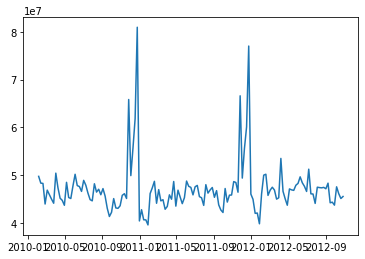

In [13]:
f, ax = plt.subplots(1,1)
ax.plot(data['sales'])

In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df, ts):
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    
    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

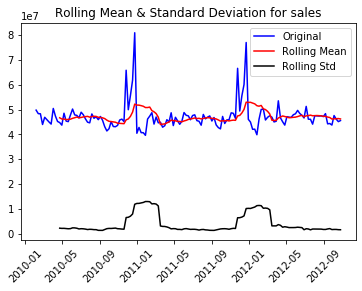

Results of Dickey-Fuller Test:
Test Statistic                -5.908298e+00
p-value                        2.675979e-07
# Lags Used                    4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [15]:
test_stationarity(df = data, ts = 'sales')

In [16]:
#function to plot transformed data
def plot_transform(df, ts, ts_transform):
    f, ax = plt.subplots(1,1)
    ax.plot(df[ts])
    ax.plot(df[ts_transform], color = 'red')

In [17]:
#log transformation

In [18]:
def log_trans(df, ts): return df[ts].apply(lambda x:np.log(x))

In [19]:
data['sales_log'] = data['sales'].apply(lambda x:np.log(x))

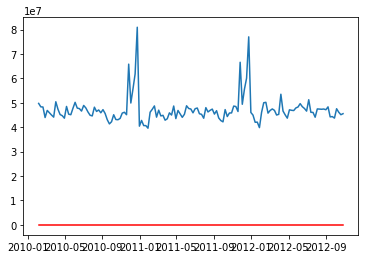

In [20]:
plot_transform(data, 'sales', 'sales_log')

In [21]:
#Differentiating and Transformations

In [22]:
data['sales_moving_avg'] = data['sales'].rolling(window =7 , center= False).mean() #Moving Average
data['sales_log_diff'] = data['sales_log'].diff() #Logarithmic transformation
data['sales_moving_avg_diff'] = data['sales']-data['sales_moving_avg'] #Moving Average Differentating
data['sales_log_ewma']=data['sales_log'].ewm(halflife =7, ignore_na =False,min_periods=0, adjust=True).mean() #Logarithmic Exponential Weighted Moving Average
data['sales_log_ewma_diff']=data['sales_log']-data['sales_log_ewma'] #Log Exponential Moving Average Differentiation

data_trans=data.dropna()

In [23]:
data_trans['sales_log_ewma']=data_trans['sales_log'].ewm(halflife =7, ignore_na =False,min_periods=0, adjust=True).mean() 
data_trans['sales_log_ewma_diff']=data_trans['sales_log']-data_trans['sales_log_ewma']

C:\Users\OWNER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\OWNER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


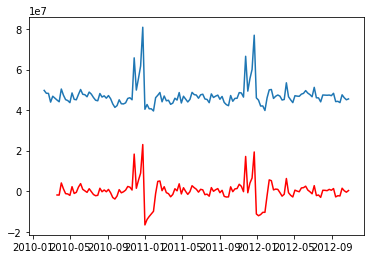

In [24]:
plot_transform(data, 'sales','sales_moving_avg_diff')

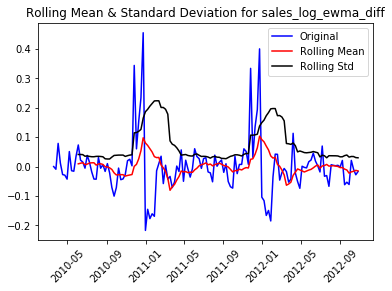

Results of Dickey-Fuller Test:
Test Statistic                -6.489575e+00
p-value                        1.236279e-08
# Lags Used                    4.000000e+00
Number of Observations Used    1.320000e+02
Critical Value (1%)           -3.480888e+00
Critical Value (5%)           -2.883697e+00
Critical Value (10%)          -2.578586e+00
dtype: float64


In [25]:
test_stationarity(data_trans, 'sales_log_ewma_diff')

In [26]:
#Decomposition Analysis

In [27]:
def plot_decomposition(df, ts,trend,seasonal, residual):

  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

  ax1.plot(df[ts], label = 'Original')
  ax1.legend(loc = 'best')
  ax1.tick_params(axis = 'x', rotation = 45)

  ax2.plot(df[trend], label = 'Trend')
  ax2.legend(loc = 'best')
  ax2.tick_params(axis = 'x', rotation = 45)

  ax3.plot(df[seasonal],label = 'Seasonality')
  ax3.legend(loc = 'best')
  ax3.tick_params(axis = 'x', rotation = 45)

  ax4.plot(df[residual], label = 'Residuals')
  ax4.legend(loc = 'best')
  ax4.tick_params(axis = 'x', rotation = 45)
  plt.tight_layout()

  #plt.subtitle('Signal Decomposition of  %s' %(ts), x =0.5, y= 1.05, fontsize = 18)
  plt.show()

C:\Users\OWNER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  
C:\Users\OWNER\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\OWNER\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


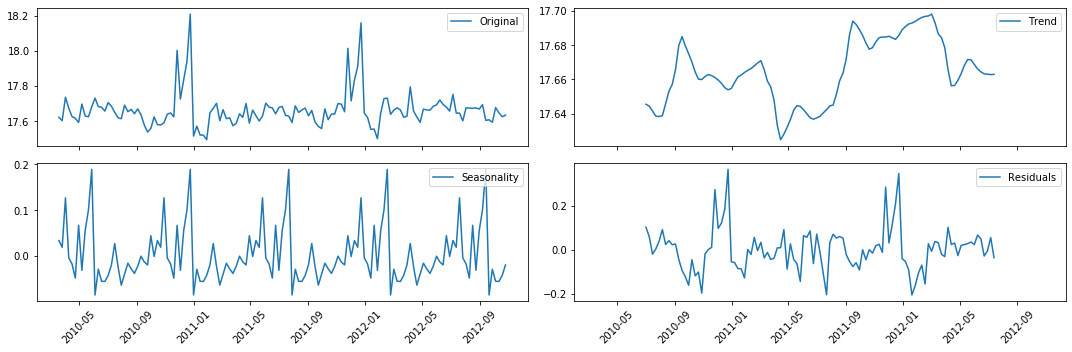

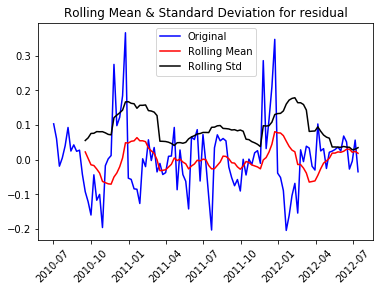

Results of Dickey-Fuller Test:
Test Statistic                -5.683796e+00
p-value                        8.368786e-07
# Lags Used                    4.000000e+00
Number of Observations Used    1.020000e+02
Critical Value (1%)           -3.496149e+00
Critical Value (5%)           -2.890321e+00
Critical Value (10%)          -2.582122e+00
dtype: float64


In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_trans['sales_log'], freq = 30)

data_trans.loc[:,'trend'] = decomposition.trend
data_trans.loc[:,'seasonal'] = decomposition.seasonal
data_trans.loc[:,'residual'] = decomposition.resid

plot_decomposition(df = data_trans, ts= 'sales_log',trend='trend', seasonal='seasonal',residual='residual')

test_stationarity(data_trans.dropna(), ts='residual')

In [29]:
def plot_acf_pacf(df, ts):
  """
  Plot auto-correlation function (ACF) and partial auto-correlation (PACF) plots
  """
  f, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5)) 

  #Plot ACF: 

  ax1.plot(lag_acf)
  ax1.axhline(y=0,linestyle='--',color='gray')
  ax1.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.set_title('Autocorrelation Function for %s' %(ts))

  #Plot PACF:
  ax2.plot(lag_pacf)
  ax2.axhline(y=0,linestyle='--',color='gray')
  ax2.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.set_title('Partial Autocorrelation Function for %s' %(ts))
  
  plt.tight_layout()
  plt.show()
  plt.close()
  
  return

C:\Users\OWNER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


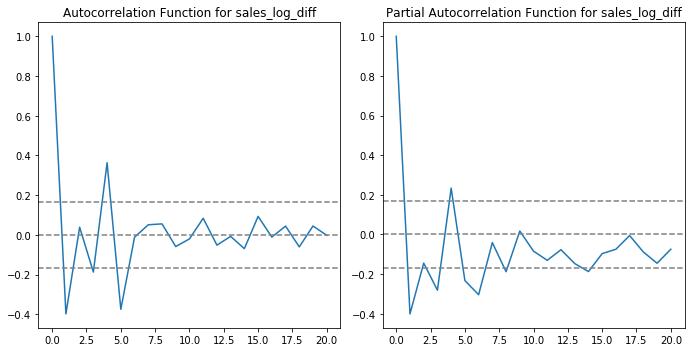

In [30]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(np.array(data_trans['sales_log_diff']),nlags=20)
lag_pacf=pacf(np.array(data_trans['sales_log_diff']),nlags=20)

plot_acf_pacf(df=data_trans, ts= 'sales_log_diff')

In [31]:
#ARIMA

In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
def run_arima(df,ts,p,d,q):
  
  model=ARIMA(df[ts], order=(p,d,q))
  results_arima=model.fit(disp=-1)

  len_results = len(results_arima.fittedvalues)
  ts_modified = df[ts][-len_results:]

  rss  = sum((results_arima.fittedvalues - ts_modified)**2)
  rmse = np.sqrt(rss/ len(df[ts]))

  plt.figure()
  plt.plot(df[ts])
  plt.plot(results_arima.fittedvalues, color='red')

  plt.show()

  return results_arima


C:\Users\OWNER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


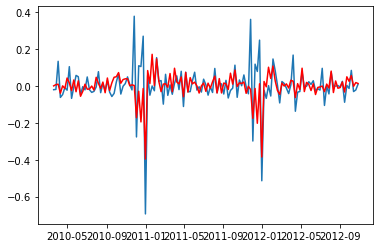

In [34]:
#run ARIMA
model_ARIMA = run_arima(df= data_trans, ts='sales_log_diff',p=3,d=0,q=3)

In [48]:
#!pip install pystan
#!pip install gcc
!pip install prophet
#conda install -c conda-forge fbprophet

  Created wheel for prophet: filename=prophet-0.1.1-py3-none-any.whl size=12172 sha256=49b0d0e6d6d8fad7ffbed6d582e18283ec113a0118329f4abf2317d6c24a3bbb
  Stored in directory: c:\users\owner\appdata\local\pip\cache\wheels\7c\58\83\1630fb0da712ead7a279888f7bfe035c849cd3866ae460ffae
Successfully built prophet


In [49]:
from fbprophet import Prophet

import datetime
from datetime import datetime

ModuleNotFoundError: No module named 'fbprophet'

In [38]:
import sys
print(sys.executable)

C:\Users\OWNER\anaconda3\python.exe


In [ ]:
def day_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    
    return abs((d2-d1).days + 1)

In [ ]:
date_column = 'date'
metric_column = 'sales'
table = data
start_training_date = '2010-07-03'
end_training_date = '2018-09-08'
